In [3]:
from collections import Counter
import functools as ft
from graphviz import Digraph
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
from matplotlib import pyplot as plt
import math
import numpy as np
import numpy.polynomial as np_poly
import os
import pandas as pd
from pprint import pprint
import random
import scipy as sp

from __future__ import print_function

%matplotlib inline

DIR_HOME = os.environ['HOME']
DIR_REPOS = DIR_HOME + "/neo-human/repos"
DIR_BMLSP = DIR_REPOS + "/luispedro/BuildingMachineLearningSystemsWithPython"


initialization
$
\newcommand{\Brace}[1]{\left\{#1\right\}}
\newcommand{\Bracket}[1]{\left[#1\right]}
\newcommand{\cases}[1]{\begin{cases}#1\end{cases}}
\newcommand{\Ceil}[1]{\left\lceil {#1} \right\rceil}
\newcommand{\cov}[1]{\text{cov} \sigma\left[#1\right]}
\newcommand{\diff}[2]{\frac{d #1}{d #2}}
\newcommand{\difftwo}[2]{\frac{d^2 #1}{d {#2}^2}}
\newcommand{\diffn}[2]{{#1}^{\prime}(#2)}
\newcommand{\ds}{\displaystyle}
\newcommand{\E}[1]{\mathbb{E}\left[ #1 \right]}
\newcommand{\expb}[1]{\exp\left\{#1\right\}} 
\newcommand{\EXP}[1]{\exp\left\{#1\right\}} 
\newcommand{\frachalf}[1]{\frac{#1}{2}~}
\newcommand{\fracone}[1]{\frac{1}{#1}~}
\newcommand{\fracrec}[1]{\frac{1}{#1}~}
\newcommand{\Floor}[1]{\left\lfloor {#1} \right\rfloor}
\newcommand{\half}{\fracone{2}}
\newcommand{\H}[1]{\mathbb{H}\left[#1\right]}
\newcommand{\Int}[2]{\displaystyle \int_{#1}^{#2}~}
\newcommand{\intinfinf}{\Int{-\infty}{\infty}}
\newcommand{\inv}[1]{#1^{-1}}
\newcommand{\invp}[1]{\left({#1}\right)^{-1}}
\newcommand{\KL}[2]{\text{KL}\left(#1 \Vert #2\right)}
\newcommand{\Lim}[1]{\displaystyle \lim_{#1}}
\newcommand{\Ln}[1]{\ln \left\(#1\right\)}
\newcommand{\Lnb}[1]{\ln \left\{#1\right\} }
\newcommand{\Mod}[1]{\left|#1\right|}
\newcommand{\Norm}[1]{\left\lVert #1 \right\rVert}
\newcommand{\Normsqr}[1]{\Norm{#1}^2}
\newcommand{\map}[1]{#1_{\text{MAP}}}
\newcommand{\ml}[1]{#1_{\text{ML}}}
\newcommand{\MI}[1]{\mathcal{I}\left(#1\right)}
\newcommand{\P}{\mathbb{P}}
\newcommand{\Paran}[1]{\left(#1\right)}
\newcommand{\Partial}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\Recip}[1]{ \frac{1}{ #1 } }
\newcommand{\sqrbrkt}[1]{\Bracket{#1}^2}
\newcommand{\sqrbrc}[1]{\Brace{#1}^2}
\newcommand{\trace}[1]{\text{Tr}\left( #1 \right)}
\newcommand{\traceb}[1]{\text{Tr}\left\{#1\right\}}
\newcommand{\underl}[1]{\text{$\underline{#1}$}}
\newcommand{\V}[1]{\mathbb{V}\left[#1\right]}
$
$
\DeclareMathOperator*{\argmin}{arg\,min}
\DeclareMathOperator*{\argmax}{arg\,max}
$
$
\newcommand{\mat}[1]{ \left[ \begin{matrix} #1 \end{matrix} \right] }
\newcommand{\matp}[1]{ \left( \begin{matrix} #1 \end{matrix} \right)}
\newcommand{\mats}[1]{ \begin{matrix}#1\end{matrix} }
\newcommand{\arrthree}[1]{
\begin{array}{rlr} #1 \end{array}}
$

$
\newcommand{\C}{\mathbb{C}}
\newcommand{\Ca}{\mathcal{C}}
\newcommand{\Caone}{\Ca_1}
\newcommand{\Catwo}{\Ca_2}
\newcommand{\Cak}{\Ca_k}
\newcommand{\D}{\mathcal{D}}
\newcommand{\G}{\mathcal{G}}
\newcommand{\I}{\mathcal{I}}
\newcommand{\L}{\mathcal{L}}
\newcommand{\M}{\mathcal{M}}
\newcommand{\N}{\mathbb{N}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\Ra}{\mathcal{R}}
$
$
\newcommand{\commentgray}[1]{\color{gray}{\text{#1}}}
$

sum, product
$
\newcommand{\sumi}{\displaystyle \sum_i}
\newcommand{\sumiD}{\displaystyle \sum_{i=1}^{D}}
\newcommand{\sumiL}{\displaystyle \sum_{i=1}^{L}}
\newcommand{\sumiN}{\displaystyle \sum_{i=1}^{N}}
\newcommand{\sumjD}{\displaystyle \sum_{j=1}^{D}}
\newcommand{\sumjK}{\displaystyle \sum_{j=1}^{K}}
\newcommand{\sumjMl}{\sum_{j=1}^{M-1}}
\newcommand{\sumkK}{\displaystyle \sum_{k=1}^{K}}
\newcommand{\sumkM}{\displaystyle \sum_{k=1}^{M}}
\newcommand{\sumkMl}{\sum_{k=1}^{M-1}}
\newcommand{\sumkp}{\displaystyle \sum_{k=1}^{p}}
\newcommand{\summN}{\displaystyle \sum_{m=1}^{N}}
\newcommand{\sumnN}{\displaystyle \sum_{n=1}^{N}}
$
$
\newcommand{\prodi}{\displaystyle \prod_i}
\newcommand{\prodiD}{\displaystyle \prod_{i=1}^{D}}
\newcommand{\prodiL}{\displaystyle \prod_{i=1}^{L}}
\newcommand{\prodiN}{\displaystyle \prod_{i=1}^{N}}
\newcommand{\prodjK}{\displaystyle \prod_{j=1}^{K}}
\newcommand{\prodkK}{\displaystyle \prod_{k=1}^{K}}
\newcommand{\prodmN}{\displaystyle \prod_{m=1}^{N}}
\newcommand{\prodnN}{\displaystyle \prod_{n=1}^{N}}
$

alphabet shortcuts
$
\newcommand{\ab}{\mathbf{a}}
\newcommand{\at}{\ab^T}
\newcommand{\Ab}{\mathbf{A}}
\newcommand{\At}{\Ab^T}
\newcommand{\Ai}{\inv{\Ab}}
\newcommand{\Abjk}{\Ab_{jk}}
\newcommand{\bb}{\mathbf{b}}
\newcommand{\bt}{\bb^T}
\newcommand{\Bb}{\mathbf{B}}
\newcommand{\Bt}{\Bb^T}
\newcommand{\Cb}{\mathbf{C}}
\newcommand{\Cn}{\Cb_{N}}
\newcommand{\Db}{\mathbf{D}}
\newcommand{\fb}{\mathbf{f}}
\newcommand{\fp}{f^{\prime}}
\newcommand{\Hb}{\mathbf{H}}
\newcommand{\hx}{h(\xb)}
\newcommand{\Jb}{\mathbf{J}}
\newcommand{\kb}{\mathbf{k}}
\newcommand{\kt}{\kb^T}
\newcommand{\Kb}{\mathbf{K}}
\newcommand{\Lb}{\mathbf{L}}
\newcommand{\Lt}{\Lb^T}
\newcommand{\Lbi}{\Lb^{-1}}
\newcommand{\mb}{\mathbf{m}}
\newcommand{\mt}{\mb^T}
\newcommand{\mbn}{\mb_N}
\newcommand{\mbnt}{\mbn^T}
\newcommand{\mbN}{\mb_N}
\newcommand{\mbNt}{\mbn^T}
\newcommand{\Mb}{\mathbf{M}}
\newcommand{\Qb}{\mathbf{Q}}
\newcommand{\Rb}{\mathbf{R}}
\newcommand{\sb}{\mathbf{s}}
\newcommand{\Sb}{\mathbf{S}}
\newcommand{\tb}{\mathbf{t}}
\newcommand{\tbnn}{\tb_{N}}
\newcommand{\tbnp}{\tb_{N+1}}
\newcommand{\tt}{\tb^T}
\newcommand{\Tb}{\mathbf{T}}
\newcommand{\Tt}{\Tb^T}
\newcommand{\ub}{\mathbf{u}}
\newcommand{\Ub}{\mathbf{U}}
\newcommand{\Ut}{\Ub^T}
\newcommand{\vb}{\mathbf{v}}
\newcommand{\Vb}{\mathbf{V}}
\newcommand{\wb}{\mathbf{w}}
\newcommand{\wnr}[1]{\wb^{(\text{#1})}}
\newcommand{\wt}{\wb^T}
\newcommand{\Wb}{\mathbf{W}}
\newcommand{\Wt}{\Wb^T}
\newcommand{\Wtilde}{\widetilde{\Wb}}
\newcommand{\Wtildet}{\Wtilde^T}
\newcommand{\Xb}{\mathbf{X}}
\newcommand{\Xt}{\Xb^T}
\newcommand{\Xk}{\Xb_k}
\newcommand{\Xkt}{\Xk^T}
\newcommand{\Xtilde}{\widetilde{\Xb}}
\newcommand{\Xtildet}{\Xtilde^T}
\newcommand{\xb}{\mathbf{x}}
\newcommand{\xt}{\xb^T}
\newcommand{\xtilde}{\widetilde{\xb}}
\newcommand{\xtilden}{\xtilde_n}
\newcommand{\xtildent}{\xtilden^T}
\newcommand{\xp}{x^{\prime}}
\newcommand{\xbp}{\xb^{\prime}}
\newcommand{\xbm}{\xb_m}
\newcommand{\xbn}{\xb_n}
\newcommand{\xbnp}{\xb_{N+1}}
\newcommand{\xab}{\mathbf{x_a}}
\newcommand{\xabt}{\mathbf{x_a}^T}
\newcommand{\xbb}{\mathbf{x_b}}
\newcommand{\xbbt}{\mathbf{x_b}^T}
\newcommand{\yb}{\mathbf{y}}
\newcommand{\yt}{\yb^T}
\newcommand{\yx}{y(\xb)}
\newcommand{\Yb}{\mathbf{Y}}
\newcommand{\Yt}{\Yb^T}
\newcommand{\zb}{\mathbf{z}}
\newcommand{\zt}{\zb^T}
\newcommand{\zbm}{\zb_m}
\newcommand{\zbn}{\zb_n}
\newcommand{\zbnp}{\zb_{n-1}}
\newcommand{\znk}{\zb_{nk}}
\newcommand{\znpj}{\zb_{n-1,j}}
\newcommand{\Zb}{\mathbf{Z}}
$

math shortcuts
$
\newcommand{\alphab}{\pmb{\alpha}}
\newcommand{\alphabt}{\alphab^T}
\newcommand{\betab}{\pmb{\beta}}
\newcommand{\betabp}{\betab^{\prime}}
\newcommand{\chib}{\boldsymbol{\chi}}
\newcommand{\etab}{\pmb{\eta}}
\newcommand{\etabp}{\etab^{\prime}}
\newcommand{\etat}{\eta^T}
\newcommand{\etabt}{\etab^T}
\newcommand{\Lambdab}{\pmb{\Lambda}}
\newcommand{\laa}{\Lambda_{aa}}
\newcommand{\laai}{\Lambda_{aa}^{-1}}
\newcommand{\lab}{\Lambda_{ab}}
\newcommand{\lba}{\Lambda_{ba}}
\newcommand{\lbb}{\Lambda_{bb}}
\newcommand{\lbbi}{\Lambda_{bb}^{-1}}
\newcommand{\li}{\Lambda^{-1}}
\newcommand{\Li}{\Lambda^{-1}}
\newcommand{\mub}{\pmb{\mu}}
\newcommand{\mut}{\mub^T}
\newcommand{\muab}{\pmb{\mu}_a}
\newcommand{\mubb}{\pmb{\mu}_b}
\newcommand{\Phib}{\pmb{\Phi}}
\newcommand{\Phibt}{\Phib^T}
\newcommand{\pib}{\pmb{\pi}}
\newcommand{\sigmasqr}{\sigma^2}
\newcommand{\saa}{\Sigma_{aa}}
\newcommand{\sab}{\Sigma_{ab}}
\newcommand{\sba}{\Sigma_{ba}}
\newcommand{\sbb}{\Sigma_{bb}}
\newcommand{\Sigmai}{\inv{\Sigma}}
\newcommand{\thetab}{\pmb{\theta}}
\newcommand{\thetat}{\thetab^T}
\newcommand{\thetabh}{\hat{\thetab}}
\newcommand{\thetaold}{\thetab^{\text{old}}}
$
$
\newcommand{\zerob}{\pmb{0}}
\newcommand{\oneb}{\pmb{1}}
\newcommand{\ed}{\mathbb{E}_{\D}}
\newcommand{\edyx}{\ed\left[y(\xb ; \D)\right]}
\newcommand{\dx}{~dx}
\newcommand{\dxb}{~d\xb}
\newcommand{\pxdxb}{p(\xb) \dxb}
\newcommand{\dwb}{~d\wb}
$

aliases for distributions
$\newcommand{\multivarcoeff}{\frac{1}{(2\pi)^{D/2}}
\frac{1}{\left| \mathbf{\Sigma}\right|^{1/2}}}$
$\newcommand{\multivarexp}[2]
{
\left\{
 -\frac{1}{2} 
 {#1}^T 
 #2
 {#1}
\right\}
}$
$\newcommand{\multivarexpx}[1]{\multivarexp{#1}{\Sigma^{-1}}}$
$\newcommand{\multivarexpstd}{\multivarexpx{(\xb-\mub)}}$
$\newcommand{\gam}{\operatorname{Gam}}$
$
\newcommand{\Nl}[3]{\mathcal{N}\left(#1 \mid #2, #3\right)}
\newcommand{\Nstdx}{\Nl{\mathbf{x}}{\mathbf{\mu}}{\Sigma}}
$

In [ ]:
HTML("<style>"\
    "div.cell{"\
        "width:50%;"\
        "margin-left:25%;"\
        "margin-right:auto;"\
    "}"\
"</style>")

# sampling from a discrete prob dist

there are two ways i can think of.  

1. seemingly linear
  1. sort the probabilities in increasing order
  1. call the left bin boundaries $\ds \{LB_i\}'s$
  1. `for i in N-1 .. 0:`
    1. `if` $U \ge LB_i$:
      1. `return i`
1. balanced binary tree
  1. make sure at each split, the number of nodes on both children are equal
1. Huffman way
  1. make sure the most probable one is easily reachable
  1. form the tree in an agglomerative way
  1. start with N nodes, each with probability $p_i$
  1. merge the least two probable nodes and set prob of the new nodes = sum of the old nodes
  1. place the greater of the old nodes on __left child__
    1. then the tree looks like "foldRight" incarnate
  1. search using the same rules as bsearch, with half of the label of a node serving as the __lower bound__.
  1. if __right child__ is used as greater of the old nodes, then half-label is the __upper bound__
  1. this approach
  
2017-05-04 04:12:52

# Geometric RV [4d]

X is geometric if  
$\ds \P(X=i) = p ~ q^{i-1}$

Then,  
$\arrthree{
\ds \sum_{i=1}^{j-1} \P \Bracket{X=i} &=
1 - \P \Bracket{X \gt j-1}
\\ &=
1 - \P \Bracket{\text{first j-1 trials are failure}}
\\ &=
1 - q^{j-1}
}$

hence generate U and set X to j such that  
$\ds 1-q^{j-1} \le U \lt 1-q^j$.  
or  
$\ds q^j \lt 1 - U \le q^{j-1}$

Hence, $\ds X = \argmin_j \Brace{q^j \lt 1-U}$

Now, since log is monotone, we can translate the previous stmt to $\leadsto$  
$\arrthree{
\ds X &= \ds \argmin_j \Brace{j \log(q) \lt \log(1-U)}
\\ &=
\ds \argmin_j \Brace{j \gt \frac{\log(1-U)}{\log(q)}}
& \commentgray{since q and U are probs, log < 0}
\\ &=
\ds \Floor{\frac{\log(1-U)}{\log(q)}} + 1
}$

# Taylor series of e

$
\ds e - 1  = \sum_{i} \Recip{i!}
$

In [18]:
def find_e(N=10):
    # sum_so_far = 1. not 0., since we have to consider 1/0!
    sum_so_far, curr = 1., 1.
    # 1/0! included already, hence start i from 1
    for i in range(1, N+1):
        curr *= (1./i)
        sum_so_far += curr
    return sum_so_far
print("e: actual:{0} sim: {1} diff: {2}".format(math.e, find_e(100), abs(math.e-find_e(100))))

e: actual:2.718281828459045 sim: 2.7182818284590455 diff: 4.440892098500626e-16


# Simulating Poisson

$\ds p_i = \P \Bracket{X = i} =
\ds \exp^{-\lambda} \frac{\lambda^i}{i!}
$  

$\ds p_{i+1} = 
\frac{\lambda}{i+1} ~ p_i
$

10 [ 39 155 199 218 182 101  56  32  14   3   1]


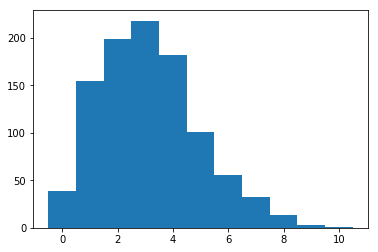

In [51]:
def sim_poisson(p_lambda=5):
    u = random.random()
    curr, i = math.e**(-p_lambda), 0
    cum_sum = curr
    while True:
        if u < cum_sum:
            return i
        i += 1
        curr *= p_lambda/i
        cum_sum += curr



vals_poisson = [sim_poisson(3.2) for _ in range(1000)]
N = max(vals_poisson)
print(N, np.bincount(vals_poisson))
plt.bar(range(N+1), np.bincount(vals_poisson), width=1)
plt.show()

In [40]:
plt.bar(np.bincount(vals_poisson))

TypeError: bar() missing 1 required positional argument: 'height'

In [43]:
plt.bar(range(N), np.bincount(vals_poisson), width=1)

NameError: name 'N' is not defined

# exercises

## 1/3, 2/3

In [55]:
def ex1(n=100):
    p1 = 1./3
    num_1, num_2 = 0, 0
    for _ in range(n):
        u = random.random()
        if u < p1:
            num_1 += 1
        else:
            num_2 += 1
    return (num_1/n, num_2/n)
print(ex1(100), ex1(1000), ex1(10000))

(0.32, 0.68) (0.342, 0.658) (0.3287, 0.6713)


In [70]:
sorted([0.3, 0.2, 0.35, 0.15], reverse=True)

[0.35, 0.3, 0.2, 0.15]

In [90]:
def ex3_naive(probs, num_iterations=1000):
    n = len(probs)
    csum = np.cumsum(probs)
    num_samples = np.array([0 for _ in range(n)])
    for _ in range(num_iterations):
        u = random.random()
        for ix in range(n):
            if u <= csum[ix]:
                num_samples[ix] += 1
                break
    return num_samples/num_iterations
def ex3_eff(probs, num_iterations=1000):
    probs = sorted(probs, reverse=True)
    n = len(probs)
    csum = np.cumsum(probs)
    num_samples = np.array([0 for _ in range(n)])
    for _ in range(num_iterations):
        u = random.random()
        for ix in range(n):
            if u <= csum[ix]:
                num_samples[ix] += 1
                break
    return num_samples/num_iterations

probs = np.array([random.random() for _ in range(100)])
probs /= np.sum(probs)

In [93]:
%%timeit
ex3_naive(probs, 10**4)

86.4 ms ± 11.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [94]:
%%timeit
ex3_eff(probs, 10**4)

58.3 ms ± 1.26 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
